# introduction 

this goal of project is to analyze biosiversity data from the national parks service particularly around various species obsered in different national park location 
this project will sprcop analyze prepare plot data and seek to explain the findings from the analysis 

In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dir(str)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isascii',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'removeprefix',
 'removesuffix',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'stri

In [3]:
dir(pd)

['ArrowDtype',
 'BooleanDtype',
 'Categorical',
 'CategoricalDtype',
 'CategoricalIndex',
 'DataFrame',
 'DateOffset',
 'DatetimeIndex',
 'DatetimeTZDtype',
 'ExcelFile',
 'ExcelWriter',
 'Flags',
 'Float32Dtype',
 'Float64Dtype',
 'Float64Index',
 'Grouper',
 'HDFStore',
 'Index',
 'IndexSlice',
 'Int16Dtype',
 'Int32Dtype',
 'Int64Dtype',
 'Int64Index',
 'Int8Dtype',
 'Interval',
 'IntervalDtype',
 'IntervalIndex',
 'MultiIndex',
 'NA',
 'NaT',
 'NamedAgg',
 'Period',
 'PeriodDtype',
 'PeriodIndex',
 'RangeIndex',
 'Series',
 'SparseDtype',
 'StringDtype',
 'Timedelta',
 'TimedeltaIndex',
 'Timestamp',
 'UInt16Dtype',
 'UInt32Dtype',
 'UInt64Dtype',
 'UInt64Index',
 'UInt8Dtype',
 '__all__',
 '__builtins__',
 '__cached__',
 '__deprecated_num_index_names',
 '__dir__',
 '__doc__',
 '__docformat__',
 '__file__',
 '__getattr__',
 '__git_version__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_config',
 '_is_numpy_dev',
 '_libs',
 '_testing',
 '

# loding the data 

In [4]:
species =pd.read_csv('species_info .csv',encoding='utf-8')


In [5]:
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [6]:
observation =pd.read_csv('observations .csv')

In [7]:
observation.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [8]:
print(f"species shape:{species.shape}")
print(f"observation shape:{observation.shape}")

species shape:(5824, 4)
observation shape:(23296, 3)


# explore data 

In [9]:
species.scientific_name.nunique()

5541

In [10]:
print(f"number of species:{species.scientific_name.nunique()} {species.shape}")

number of species:5541 (5824, 4)


In [11]:
species.category.value_counts

<bound method IndexOpsMixin.value_counts of 0               Mammal
1               Mammal
2               Mammal
3               Mammal
4               Mammal
             ...      
5819    Vascular Plant
5820    Vascular Plant
5821    Vascular Plant
5822    Vascular Plant
5823    Vascular Plant
Name: category, Length: 5824, dtype: object>

In [12]:
species.groupby("category").size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

In [13]:
print(f"number of conservation statuses:{species.conservation_status.nunique()}")
print(f"nunique of conservation statuses:{species.conservation_status.nunique()}")

number of conservation statuses:4
nunique of conservation statuses:4


In [14]:
print(f"na values:{species.conservation_status.isna().sum()}")

na values:5633


In [15]:
print(species.groupby("conservation_status").size())

conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64


# observation

In [16]:
print(f"number of parks:{observation.park_name.nunique()}")
print(species.groupby("conservation_status").size())

number of parks:4
conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64


In [17]:
print(f'number of observations:{observation.observations.sum()}')


number of observations:3314739


# analysis

In [18]:
species.fillna('NO INTERVENTION',inplace=True)

In [19]:
species.groupby("conservation_status").size()

conservation_status
Endangered              16
In Recovery              4
NO INTERVENTION       5633
Species of Concern     161
Threatened              10
dtype: int64

In [20]:
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NO INTERVENTION
1,Mammal,Bos bison,"American Bison, Bison",NO INTERVENTION
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NO INTERVENTION
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NO INTERVENTION
4,Mammal,Cervus elaphus,Wapiti Or Elk,NO INTERVENTION


In [21]:
conservationcategory = species[species.conservation_status!="NO INTERVENTION"]\
.groupby(["conservation_status","category"])['scientific_name']\
.count()\
.unstack()
print(conservationcategory)

category             Amphibian  Bird  Fish  Mammal  Nonvascular Plant  \
conservation_status                                                     
Endangered                 1.0   4.0   3.0     7.0                NaN   
In Recovery                NaN   3.0   NaN     1.0                NaN   
Species of Concern         4.0  72.0   4.0    28.0                5.0   
Threatened                 2.0   NaN   4.0     2.0                NaN   

category             Reptile  Vascular Plant  
conservation_status                           
Endangered               NaN             1.0  
In Recovery              NaN             NaN  
Species of Concern       5.0            43.0  
Threatened               NaN             2.0  


Text(0, 0.5, 'number of species')

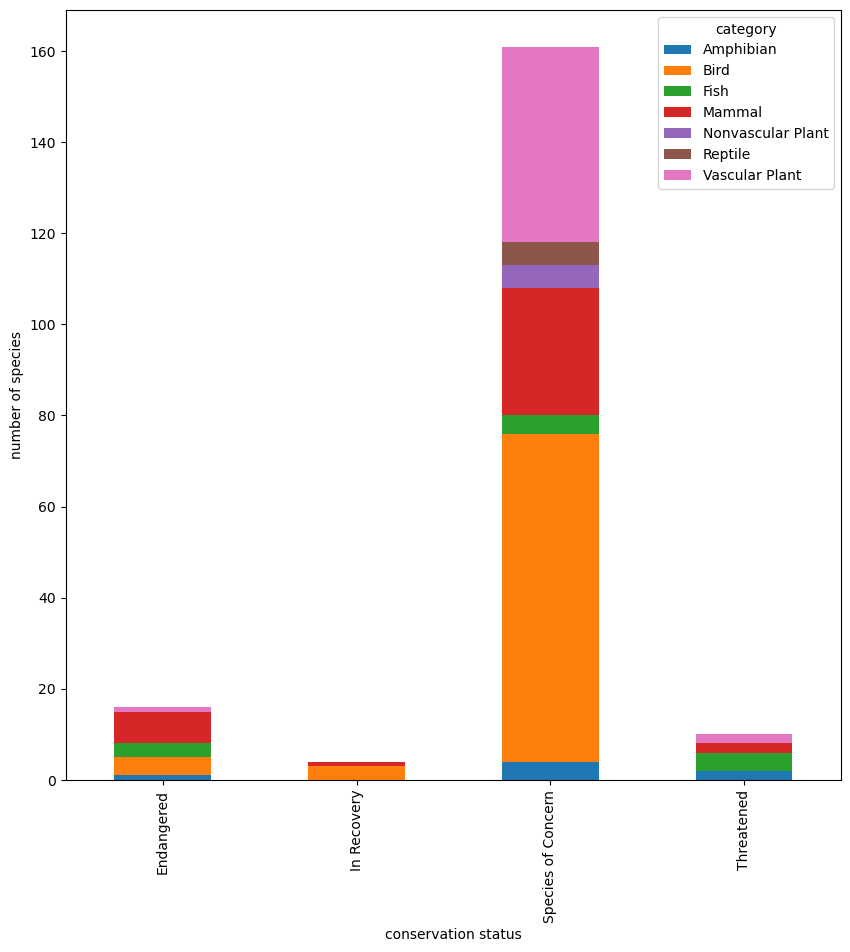

In [22]:
ax = conservationcategory.plot(kind = 'bar',figsize=(10,10),stacked=True)
ax.set_xlabel("conservation status")
ax.set_ylabel("number of species")

# create a pie chart of the distribution of park categories

Text(0.5, 1.0, 'DISTRIBUTION OF PARK CATEGORITS')

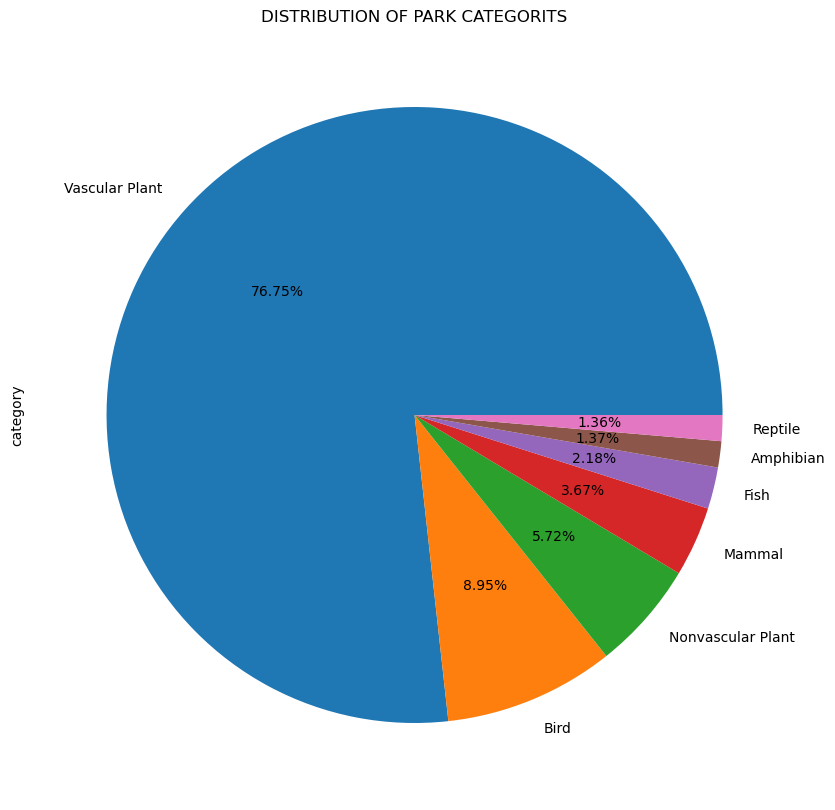

In [23]:
plt.figure(figsize=(10,10))
category_counts= species['category'].value_counts()
category_counts.plot(kind='pie',autopct='%1.2f%%')
plt.title('DISTRIBUTION OF PARK CATEGORITS')

# get the top10 most common families of species

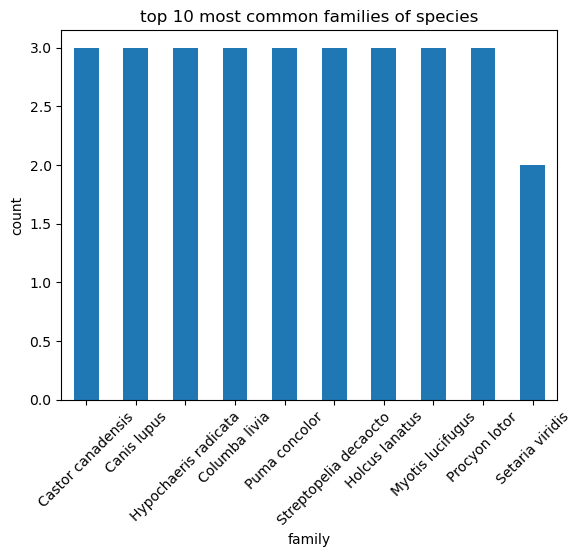

In [24]:
top_families= species['scientific_name'].value_counts().head(10)
top_families.plot(kind='bar')
plt.title('top 10 most common families of species')
plt.xlabel('family')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show()

# in conservation

In [25]:
species['is_protected']=species.conservation_status !='NO INTERVENTION'

In [26]:
species.tail()

,category,scientific_name,common_names,conservation_status,is_protected
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,NO INTERVENTION,False
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",NO INTERVENTION,False
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",NO INTERVENTION,False
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",NO INTERVENTION,False
5823,Vascular Plant,Tribulus terrestris,"Bullhead, Caltrop, Goathead, Mexican Sandbur, ...",NO INTERVENTION,False


In [27]:
category_counts =species.groupby(['category','is_protected'])\
.scientific_name.nunique()\
.reset_index()\
.pivot(columns='is_protected',
       index='category',
      values='scientific_name')\
.reset_index()
category_counts.columns=['category','not_protected','protected']
category_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


In [28]:
category_counts['percent_protected']=category_counts.protected/ \
(category_counts.protected + category_counts.not_protected) *100
category_counts

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


# statistical significance

In [29]:
from scipy.stats import chi2_contingency
contingency1 =[
    [30,146],
    [75,413]
]
chi2_contingency(contingency1)

Chi2ContingencyResult(statistic=0.1617014831654557, pvalue=0.6875948096661336, dof=1, expected_freq=array([[ 27.8313253, 148.1686747],
       [ 77.1686747, 410.8313253]]))

# species in parks

In [30]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [31]:
import string
def remove_punctuation(text):
    for punctuations in string.punctuation:#!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
        text=text.replace(punctuation,'')
        return text
    remove_punctuation("hello! how are you,i am ok")

In [32]:
"Gappers,RedBacked,Vole".split(",")

['Gappers', 'RedBacked', 'Vole']

In [33]:
import string

In [34]:
def remove_punctuation(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation,'')
        return text
common_name=species[species.category =="Mammal"]\
.common_names\
.apply(remove_punctuation)\
.str.split().tolist()
common_name[:6]

[["Gapper's", 'Red-Backed', 'Vole'],
 ['American', 'Bison,', 'Bison'],
 ['Aurochs,',
  'Aurochs,',
  'Domestic',
  'Cattle',
  '(Feral),',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep,', 'Mouflon,', 'Red', 'Sheep,', 'Sheep', '(Feral)'],
 ['Wapiti', 'Or', 'Elk'],
 ['White-Tailed', 'Deer']]

In [35]:
cleanRows=[]
for item in common_name:
    item=list(dict.fromkeys(item))
    cleanRows.append(item)
cleanRows[:6]

[["Gapper's", 'Red-Backed', 'Vole'],
 ['American', 'Bison,', 'Bison'],
 ['Aurochs,', 'Domestic', 'Cattle', '(Feral),', 'Domesticated'],
 ['Domestic', 'Sheep,', 'Mouflon,', 'Red', 'Sheep', '(Feral)'],
 ['Wapiti', 'Or', 'Elk'],
 ['White-Tailed', 'Deer']]

In [36]:
for i in cleanRows:
    print(i,"---")

["Gapper's", 'Red-Backed', 'Vole'] ---
['American', 'Bison,', 'Bison'] ---
['Aurochs,', 'Domestic', 'Cattle', '(Feral),', 'Domesticated'] ---
['Domestic', 'Sheep,', 'Mouflon,', 'Red', 'Sheep', '(Feral)'] ---
['Wapiti', 'Or', 'Elk'] ---
['White-Tailed', 'Deer'] ---
['Feral', 'Hog,', 'Wild', 'Pig'] ---
['Coyote'] ---
['Gray', 'Wolf'] ---
['Red', 'Wolf'] ---
['Common', 'Gray', 'Fox,', 'Fox'] ---
['Black', 'Fox,', 'Cross', 'Red', 'Silver', 'Fox'] ---
['Red', 'Fox'] ---
['Mountain', 'Lion'] ---
['Wild', 'Cat,', 'Wildcat'] ---
['Bobcat'] ---
['Panther', '(Mountain', 'Lion)'] ---
['Striped', 'Skunk'] ---
['Eastern', 'Spotted', 'Skunk'] ---
['River', 'Otter'] ---
['Northern', 'River', 'Otter'] ---
['Fisher'] ---
['Mink', '(Or', 'Weasel)'] ---
['Long-Tailed', 'Weasel'] ---
['Least', 'Weasel'] ---
['Mink'] ---
['Common', 'Raccoon,', 'Raccoon'] ---
['Black', 'Bear'] ---
["Rafinesque's", 'Big-Eared', 'Bat'] ---
['Big', 'Brown', 'Bat'] ---
['Silver-Haired', 'Bat'] ---
['Eastern', 'Red', 'Bat,', 'Ba

In [37]:
from itertools import chain
res =list(chain.from_iterable(i if isinstance(i, list)else[i]for i in cleanRows))
res[:10]

["Gapper's",
 'Red-Backed',
 'Vole',
 'American',
 'Bison,',
 'Bison',
 'Aurochs,',
 'Domestic',
 'Cattle',
 '(Feral),']

In [38]:
for n in cleanRows:
    print("--",n)
    for x in n:
        print("--",x)

-- ["Gapper's", 'Red-Backed', 'Vole']
-- Gapper's
-- Red-Backed
-- Vole
-- ['American', 'Bison,', 'Bison']
-- American
-- Bison,
-- Bison
-- ['Aurochs,', 'Domestic', 'Cattle', '(Feral),', 'Domesticated']
-- Aurochs,
-- Domestic
-- Cattle
-- (Feral),
-- Domesticated
-- ['Domestic', 'Sheep,', 'Mouflon,', 'Red', 'Sheep', '(Feral)']
-- Domestic
-- Sheep,
-- Mouflon,
-- Red
-- Sheep
-- (Feral)
-- ['Wapiti', 'Or', 'Elk']
-- Wapiti
-- Or
-- Elk
-- ['White-Tailed', 'Deer']
-- White-Tailed
-- Deer
-- ['Feral', 'Hog,', 'Wild', 'Pig']
-- Feral
-- Hog,
-- Wild
-- Pig
-- ['Coyote']
-- Coyote
-- ['Gray', 'Wolf']
-- Gray
-- Wolf
-- ['Red', 'Wolf']
-- Red
-- Wolf
-- ['Common', 'Gray', 'Fox,', 'Fox']
-- Common
-- Gray
-- Fox,
-- Fox
-- ['Black', 'Fox,', 'Cross', 'Red', 'Silver', 'Fox']
-- Black
-- Fox,
-- Cross
-- Red
-- Silver
-- Fox
-- ['Red', 'Fox']
-- Red
-- Fox
-- ['Mountain', 'Lion']
-- Mountain
-- Lion
-- ['Wild', 'Cat,', 'Wildcat']
-- Wild
-- Cat,
-- Wildcat
-- ['Bobcat']
-- Bobcat
-- ['Panther

In [39]:
res=[x
     for n in cleanRows
       for x in n
    
        ]
res[:10]

["Gapper's",
 'Red-Backed',
 'Vole',
 'American',
 'Bison,',
 'Bison',
 'Aurochs,',
 'Domestic',
 'Cattle',
 '(Feral),']

In [40]:
words_counted=[]
for species_name in res:
    x=res.count(species_name)
    words_counted.append((species_name,x))
pd.DataFrame(set(words_counted),columns=['Word','Count']).sort_values("Count",ascending=False).head(10)

,Word,Count
53,Shrew,18
222,Bat,17
35,Myotis,17
200,Mouse,15
3,"Bat,",13
194,Chipmunk,13
1,American,12
170,Squirrel,12
4,Vole,11
174,Eastern,11


In [46]:
species['is_wolf']=species.common_names.str.contains(r"\bWolf\b",regex=True)
species[species['is_wolf']==True]

,category,scientific_name,common_names,conservation_status,is_protected,is_wolf,is_bat
8,Mammal,Canis lupus,Gray Wolf,Endangered,True,True,False
9,Mammal,Canis rufus,Red Wolf,Endangered,True,True,False
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery,True,True,False
3993,Vascular Plant,Euphorbia esula,"Leafy Spurge, Spurge, Wolf's Milk, Wolf's-Milk",NO INTERVENTION,False,True,False
4020,Vascular Plant,Salix wolfii var. idahoensis,Wolf's Willow,NO INTERVENTION,False,True,False
4288,Vascular Plant,Trisetum wolfii,"Wolf Trisetum, Wolf's Trisetum",NO INTERVENTION,False,True,False
4448,Mammal,Canis lupus,"Gray Wolf, Wolf",Endangered,True,True,False


In [45]:
species['is_bat']=species.common_names.str.contains(r"\bBat\b",regex=True)
species[species['is_bat']==True]

,category,scientific_name,common_names,conservation_status,is_protected,is_wolf,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,NO INTERVENTION,False,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,False,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,False,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",NO INTERVENTION,False,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,NO INTERVENTION,False,False,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,False,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,False,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,False,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,False,True
40,Mammal,Nycticeius humeralis,Evening Bat,NO INTERVENTION,False,False,True


In [52]:
bat_observation =observation.merge(species[species.is_bat])
bat_observation

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_wolf,is_bat
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,False,True
1,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,False,True
2,Lasiurus blossevillii,Yosemite National Park,123,Mammal,Western Red Bat,Species of Concern,True,False,True
3,Lasiurus blossevillii,Yellowstone National Park,221,Mammal,Western Red Bat,Species of Concern,True,False,True
4,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,NO INTERVENTION,False,False,True
...,...,...,...,...,...,...,...,...,...
139,Myotis sodalis,Yellowstone National Park,68,Mammal,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,False,True
140,Myotis leibii,Yosemite National Park,132,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,False,True
141,Myotis leibii,Bryce National Park,84,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,False,True
142,Myotis leibii,Great Smoky Mountains National Park,49,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,False,True


In [56]:
bat_observation.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411
2,Yellowstone National Park,8362
3,Yosemite National Park,4786


In [70]:
a=bat_observation.groupby(['park_name','is_protected']).observations.sum().reset_index()
a

,park_name,is_protected,observations
0,Bryce National Park,False,1596
1,Bryce National Park,True,1837
2,Great Smoky Mountains National Park,False,1299
3,Great Smoky Mountains National Park,True,1112
4,Yellowstone National Park,False,4044
5,Yellowstone National Park,True,4318
6,Yosemite National Park,False,2345
7,Yosemite National Park,True,2441


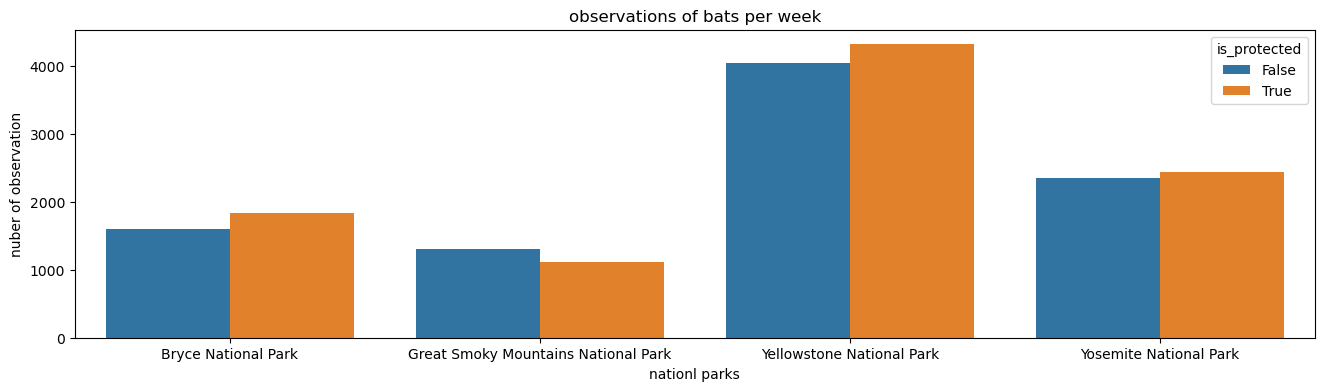

In [73]:
plt.figure(figsize=(16,4))
sns.barplot(x=a.park_name,y=a.observations,hue=a.is_protected)
plt.xlabel("nationl parks")
plt.ylabel("nuber of observation")
plt.title("observations of bats per week")
plt.show()

In [74]:
species['category'].value_counts()

Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
Name: category, dtype: int64

In [75]:
observation['park_name'].value_counts()

Great Smoky Mountains National Park    5824
Yosemite National Park                 5824
Bryce National Park                    5824
Yellowstone National Park              5824
Name: park_name, dtype: int64